In [1]:
import pandas as pd
import altair as alt
from vega_datasets import data 

In [2]:
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [4]:
weather_data = data.seattle_weather()

weather_data.sample(5)

,date,precipitation,temp_max,temp_min,wind,weather
1187,2015-04-02,0.0,13.3,5.6,2.4,sun
123,2012-05-03,18.5,11.1,7.2,3.4,rain
575,2013-07-29,0.0,25.0,13.3,1.4,sun
1084,2014-12-20,19.6,12.8,6.7,5.5,fog
1005,2014-10-02,0.0,19.4,10.0,2.0,sun


In [5]:
weather_data.shape

(1461, 6)

In [7]:
weather_data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [8]:
'''Extracting month, year and day from the column and then droppping the column later'''
weather_data['year'] = weather_data['date'].dt.year
weather_data['month'] = weather_data['date'].dt.month
weather_data['day'] = weather_data['date'].dt.day

weather_data.drop('date', axis = 1, inplace = True)

In [9]:
'''Checking to ensure that we have additional new columns that I added above'''
weather_data.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'year',
       'month', 'day'],
      dtype='object')

In [10]:
weather_data.head()

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5


In [11]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind,year,month,day
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,2013.498973,6.522930,15.729637
std,6.680194,7.349758,5.023004,1.437825,1.118723,3.449884,8.803105
min,0.000000,-1.600000,-7.100000,0.400000,2012.000000,1.000000,1.000000
25%,0.000000,10.600000,4.400000,2.200000,2012.000000,4.000000,8.000000
50%,0.000000,15.600000,8.300000,3.000000,2013.000000,7.000000,16.000000
75%,2.800000,22.200000,12.200000,4.000000,2014.000000,10.000000,23.000000
max,55.900000,35.600000,18.300000,9.500000,2015.000000,12.000000,31.000000


In [12]:
weather_data['year'].unique()

array([2012, 2013, 2014, 2015], dtype=int64)

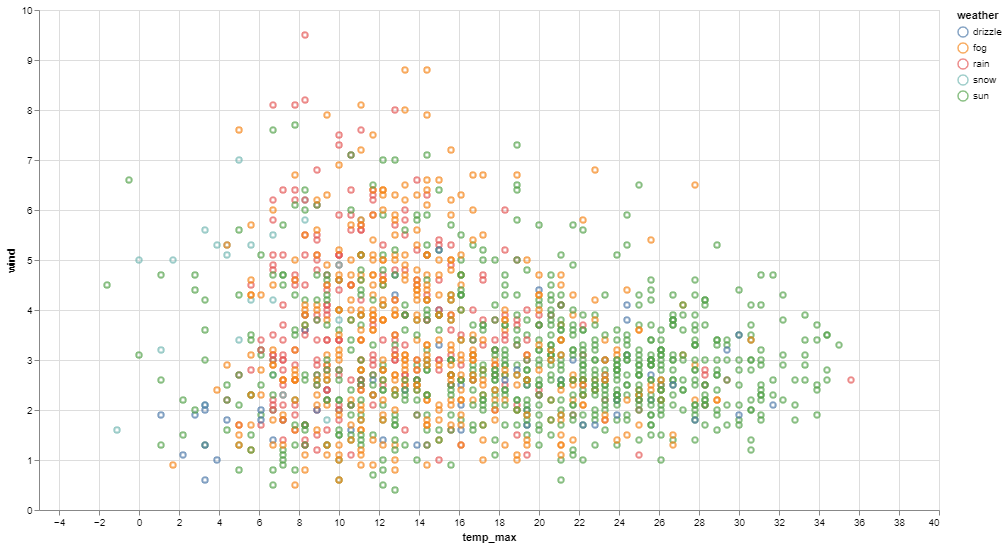

In [22]:
'''tooltip arguments is going to signify what we are going to see when we hover over the data points'''
alt.Chart(weather_data, height = 500, width = 900) \
    .mark_point() \
    .encode(x = 'temp_max:Q',
               y = 'wind:Q',
               color = 'weather:N',
               tooltip = ['weather','temp_max']) \
.interactive()

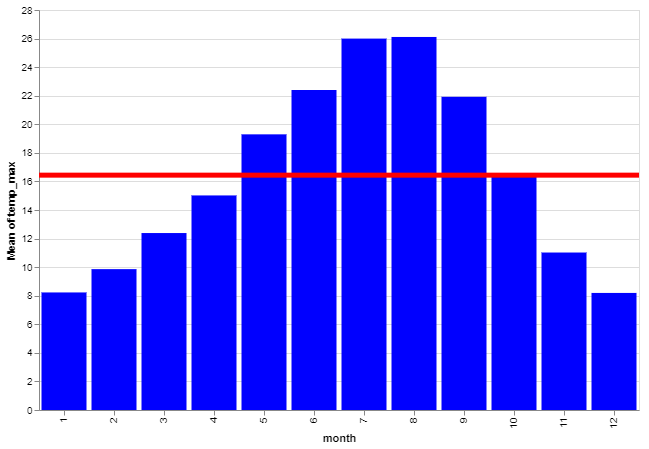

In [35]:
brush = alt.selection(type= 'interval', encodings = ['x'])

bars = alt.Chart(height = 400, width = 600) \
        .mark_bar(color = 'blue') \
        .encode(x = 'month:O',
               y = 'mean(temp_max):Q',
               opacity = alt.condition(brush,
                                      alt.OpacityValue(1),
                                      alt.OpacityValue(0.5))) \
        .add_selection(brush)

line = alt.Chart() \
        .mark_rule(color = 'red') \
        .encode(y = 'mean(temp_max):Q',
               size = alt.SizeValue(5))  \
        .transform_filter(brush)

alt.layer(bars, line, data = weather_data)